# Coding practice \#4: Due end of class, November 12

Files needed = (airline_products_2017.csv)

Answer the questions below in a jupyter notebook. You can simply add cells to this notebook and enter your answers. When you are finished, print the notebook and hand it in during class. \[To print: From the file menu, choose 'print preview' which will open a new tab with the notebook ready to print. Please print on both sides of paper if possible.\]

A reminder: Ruhl's office hours are T/R 2:30PM-3:30PM in Soc Sci 7444 and McWeeny's office hours are Monday 9:30AM-11:30AM in Soc Sci 6470. 

*You should feel free to discuss the coding practice with your classmates, but the work you turn in should be your own.*


# Exercise 0: Your name
Replace 'Your name' above with your actual name. Enter it as last name, first name. Do not forget the comma!

# Exercise 1: groupby and more bar charts

The file 'airline_products_2017.csv' contains some data used in the first chapter of Dennis's dissertation. The data are taken from the Airline Origin & Destination Survey (DB1B) but has been substantially cleaned (Thanks Dennis!).

In particular, the data contain information on a sample of airline itineraries for flights departing from one of seven airports in the San Francisco Bay region and arriving at one of the other large cities in the United States in the second quarter of 2017. Each observation contains information on the origin airport, destination airport, airline,  nonstop or connecting itinerary type, average one-way fare in dollars, and distance between the origin and destination (in miles).

In this exercise, we will make a simple scatterplot and then repeatedly use the `.groupby()` method to create several bar charts. Follow the instructions below.

### Part (a):

Load the data as a Pandas data frame and keep only the nonstop flights. Then use Seaborn's `regplot()` function to make a scatterplot of distance against prices **for nonstop flights**. Turn off the confindence interval, make the regression line black, and make the scatterpoints blue circles that are not filled in. For this you'll need to use the optional arguments `scatter_kws` and `line_kws` -- the idea is to pass dicitionaries of the desired options to each of these arguments (see the documentation for details: https://seaborn.pydata.org/generated/seaborn.regplot.html).

You'll notice a strange gap in the distance data between 1,000 and 1,500 miles --- it's called "flyover country" for a reason!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

# Load data
flights = pd.read_csv("airline_products_2017.csv")

# Keep only nonstop flights:
flights = flights[flights['nonstop'] == 1]


# Scatterplot with regression line. Notice the syntax for the extra options in .regplot().
fig0, ax0 = plt.subplots(figsize=(10,5)) 
sns.regplot(x='distance',y='fare', data=flights, 
            ci = 0,
            ax = ax0,
            scatter_kws={'color': 'blue', 'facecolors':'none'},   # blue scatter plot, unfilled marker 'faces'
            line_kws={'color': 'black'})                          # make the regression line black 

sns.despine(ax=ax0)  # despine the seaborn way

ax0.set_title("Airfare and flight distance for nonstop flights in 2017Q2")
ax0.set_xlabel("Flight distance (miles)")
ax0.set_ylabel("One-way fare (dollars)")

plt.show()

<Figure size 1000x500 with 1 Axes>

### Part (b):

1. Use the `.groupby()` method to obtain the **median** fare for nonstop flights for each airline. 

In [8]:
# Compute median fares by airline:
by_airline = flights.groupby('airline')['fare'].median()
by_airline

airline
Alaska Airlines         140.300230
Allegiant Air            63.637638
American Airlines       221.730330
Delta Air Lines         167.254630
Frontier Airlines       109.993130
JetBlue Airways         240.673565
Skywest Airlines        101.370130
Southwest Airlines      222.615730
Spirit Air Lines         92.401984
Sun Country Airlines    189.357150
United Airlines         287.500950
Virgin America          240.048885
Name: fare, dtype: float64

2. Make a bar chart displaying the median fare for American Airlines, Delta Air Lines, Southwest Airlines, and United Airlines. Give the chart appropriate labels etc. and make it look nice.

Contrary to intuition, Delta appears to have much lower fares than Southwest!

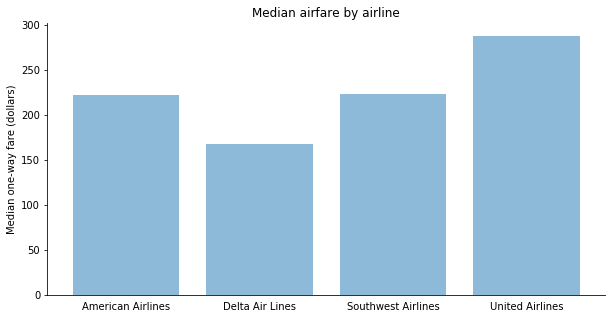

In [9]:
# List of big 4 airlines of interest
airline_list = ['American Airlines', 'Delta Air Lines', 'Southwest Airlines', 'United Airlines']

# Bar chart of median fares by airline
fig1, ax1 = plt.subplots(figsize=(10,5)) 

# only plot the rows in 'airline_list'
ax1.bar(by_airline.loc[airline_list].index, by_airline.loc[airline_list], alpha=0.5)

ax1.set_title('Median airfare by airline')
ax1.set_ylabel('Median one-way fare (dollars)')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.tick_params(bottom=False)            # Kill the ticks on the categorical axis

plt.show()


### Part (c):

The bar chart above might be misleading, because different airlines may fly to different cities that are different distances from San Francisco, so we might be confusing variation in fares across airlines with variation in fares for flights of different distances. Let's try to fix this:
   1. On the original data frame, use the `.cut()` method to create distance bins 500 miles in width (starting at 0 and ending at 3000). 
   
   2A. Use the `.groupby()` method to obtain the median airfare by distance bin by airline. 

In [4]:
# Create distance bins:
bins = [0,500,1000,1500,2000,2500,3000]

# Use .cut() function to cut the flight distance data
flights['distance_bins'] = pd.cut(flights['distance'],bins)

# Calculate the median fare by airline and distance bin and reset the index
by_airline_and_dist = flights.groupby(['distance_bins','airline'])['fare'].median()

by_airline_and_dist.head()


distance_bins  airline          
(0, 500]       Alaska Airlines      117.844825
               Allegiant Air         69.247496
               American Airlines    133.903600
               Delta Air Lines      125.328650
               JetBlue Airways       90.325570
Name: fare, dtype: float64

2B. Then reset the index on the resulting series. Your data should be *long* at this point.

\[Note: This is a series object (not a DataFrame) so you won't be able to use the `inplace=True` argument.\] 

In [5]:
by_airline_and_dist = by_airline_and_dist.reset_index()

by_airline_and_dist.head()

,distance_bins,airline,fare
0,"(0, 500]",Alaska Airlines,117.844825
1,"(0, 500]",Allegiant Air,69.247496
2,"(0, 500]",American Airlines,133.903600
3,"(0, 500]",Delta Air Lines,125.328650
4,"(0, 500]",JetBlue Airways,90.325570


   3. Keep the observations for the 4 airlines discussed above: American Airlines, Delta Air Lines, Southwest Airlines, and United Airlines.
   4. Covert the distance bin column to a string instead of an Interval object type. \[try `astype( )`\]
  

In [6]:
# Selected desired columns: just the 4 large airlines used above:
by_airline_and_dist = by_airline_and_dist[by_airline_and_dist['airline'].isin(airline_list)]

# What kind of object is a distance_bin?
print('The distance_bins type is', type(by_airline_and_dist.loc[2,'distance_bins']) )

# Convert the distnace_bins to strings rather than categoricals:
by_airline_and_dist['distance_bins'] = by_airline_and_dist['distance_bins'].astype('str')

# What kind of object is a distance_bin?
print('The distance_bins type is', type(by_airline_and_dist.loc[2,'distance_bins']) )

The distance_bins type is <class 'pandas._libs.interval.Interval'>
The distance_bins type is <class 'str'>


 5. Now let's create a **horizontal** bar chart showing the median fare by airline for two different lengths of flights: those between 0 and 500 miles  and those between 2,000 and 2,500 miles. 
 
This can be done by passing the appropriate arguments to Seaborn's `.barplot()` function. The horizontal axis should show the median fare, the vertical axis should show the two distances intervals, and each bar color should represent a different airline. Make the other aspects of the figure look nice.

The resulting chart should show that Delta has the lowest fares for the flights between 0 and 500 miles but the highest fares for flights between 2,000 and 2,500 miles.

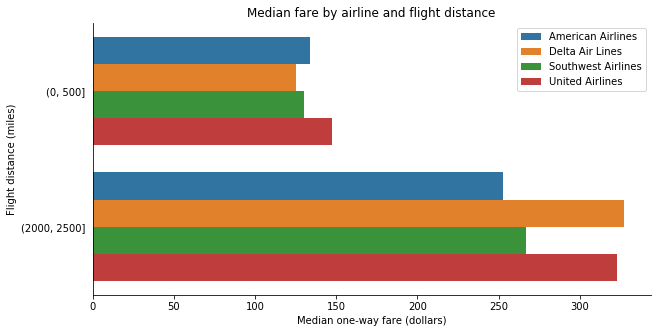

In [7]:
fig2, ax2 = plt.subplots(figsize=(10,5)) 

# Select desired flight distances:
d = by_airline_and_dist[by_airline_and_dist['distance_bins'].isin(['(0, 500]', '(2000, 2500]'])]

# Create barplot:
sns.barplot(x= 'fare', y = 'distance_bins', hue='airline', 
            data=d, ax = ax2)


# Remove spines as well as ticks from vertical axis
sns.despine()
plt.tick_params(left=False)

# No need for legend title
ax2.legend().set_title('')

# Set axis labels and title
ax2.set_xlabel('Median one-way fare (dollars)')
ax2.set_ylabel('Flight distance (miles)')
plt.title('Median fare by airline and flight distance')

plt.show()